<a href="https://colab.research.google.com/github/elabeeel/Proyecto-TELCO/blob/main/an%C3%A1lisis_y_predicci%C3%B3n_de_telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

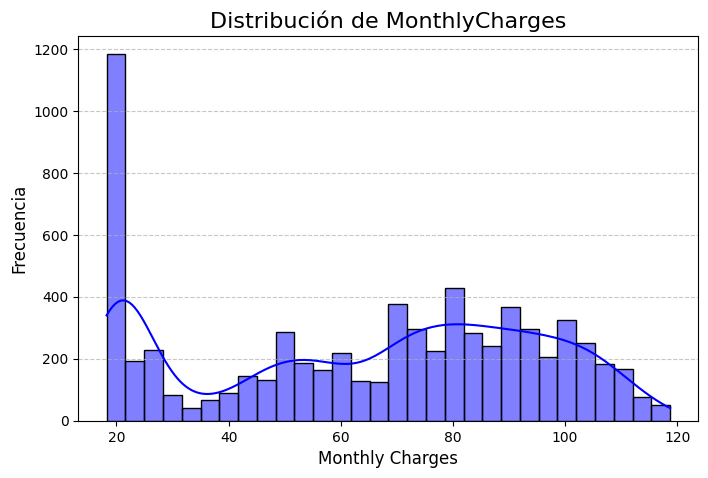

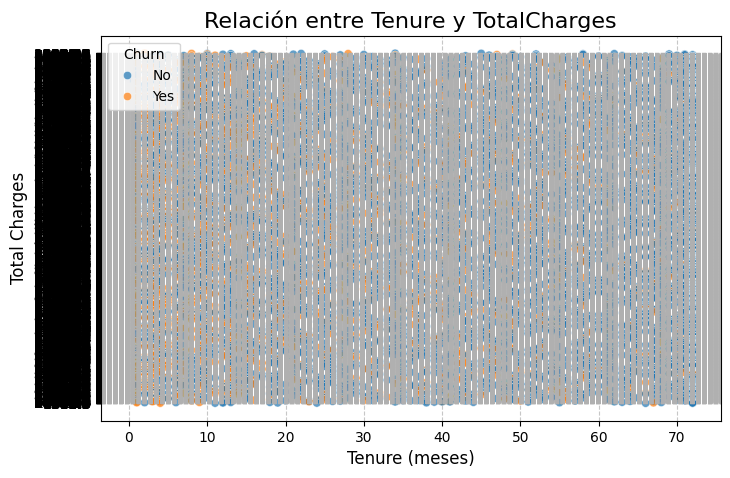

<ipython-input-3-c58f7c862d43>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['TotalCharges'] = pd.to_numeric(numerical_data['TotalCharges'], errors='coerce')


Text(0.5, 1.0, 'Matriz de Correlación')

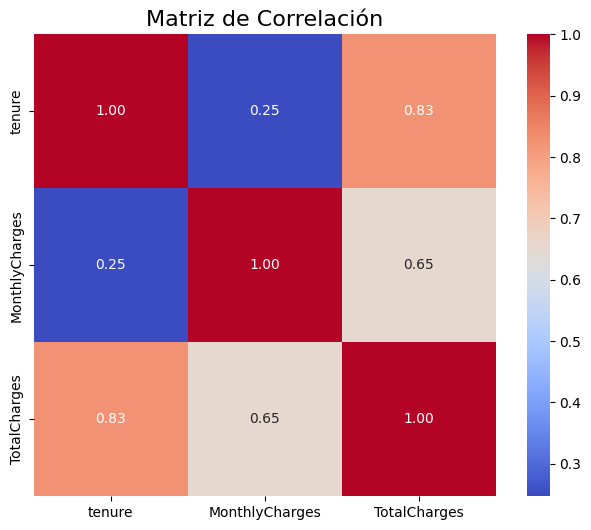

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Ruta al archivo CSV en tu Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/telco.csv'
df = pd.read_csv(file_path)

# Muestra las primeras filas del DataFrame
print(df.head())

# Muestra información sobre el DataFrame (tipos de datos, valores no nulos, etc.)
print(df.info())

# Muestra estadísticas descriptivas del DataFrame (media, desviación estándar, etc.)
print(df.describe())

#Visualizar correlaciones y distribuciones
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico 1: Distribución de MonthlyCharges
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], kde=True, color='blue', bins=30)
plt.title('Distribución de MonthlyCharges', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: Relación entre tenure y TotalCharges
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', alpha=0.7, edgecolor='w')
plt.title('Relación entre Tenure y TotalCharges', fontsize=16)
plt.xlabel('Tenure (meses)', fontsize=12)
plt.ylabel('Total Charges', fontsize=12)
plt.legend(title='Churn', loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 3: Matriz de Correlación
# Seleccionar variables numéricas relevantes
numerical_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Convert 'TotalCharges' to numeric, handling errors
numerical_data['TotalCharges'] = pd.to_numeric(numerical_data['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
numerical_data = numerical_data.dropna()

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()


# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación', fontsize=16)



In [4]:
#Procesamiento de datos
# Identificar valores faltantes en cada columna
missing_data = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_data)

# Inspeccionar valores no válidos en columnas específicas (como TotalCharges)
invalid_values = df[df['TotalCharges'].isnull()]
print("\nFilas con valores faltantes en TotalCharges:")
print(invalid_values)

data_cleaned = df.dropna(subset=['TotalCharges'])

# Verificar si aún quedan valores faltantes
remaining_missing_data = data_cleaned.isnull().sum()
print("\nValores faltantes después de la limpieza:")
print(remaining_missing_data)

# Asegurarse de que las columnas relevantes tengan los tipos de datos correctos
data_cleaned['TotalCharges'] = pd.to_numeric(data_cleaned['TotalCharges'], errors='coerce')

# Verificar nuevamente la limpieza final
print("\nDatos limpios (primeras filas):")
print(data_cleaned.head())

Valores faltantes por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Filas con valores faltantes en TotalCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

Valores faltantes después de la limpieza:
customerID          0
gender              0
SeniorCitizen       0

In [5]:
#Procesamiento de datos
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas identificadas:")
print(categorical_columns)

# Excluir columnas no relevantes para la codificación (como customerID)
categorical_columns = categorical_columns.drop('customerID')

# Realizar codificación de variables categóricas usando One-Hot Encoding
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verificar la nueva estructura del DataFrame
print("\nDatos después de la codificación:")
print(data_encoded.head())


Columnas categóricas identificadas:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

Datos después de la codificación:
   customerID  SeniorCitizen  tenure  MonthlyCharges  gender_Male  \
0  7590-VHVEG              0       1           29.85        False   
1  5575-GNVDE              0      34           56.95         True   
2  3668-QPYBK              0       2           53.85         True   
3  7795-CFOCW              0      45           42.30         True   
4  9237-HQITU              0       2           70.70        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False        

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numéricas identificadas:")
print(numerical_columns)

# Crear copias del DataFrame para normalización y estandarización
data_normalized = df.copy()
data_standardized = df.copy()

# Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
data_normalized[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])

print("\nDatos normalizados (primeras filas):")
print(data_normalized[numerical_columns].head())

# Estandarización (Z-Score Scaling)
scaler_standard = StandardScaler()
data_standardized[numerical_columns] = scaler_standard.fit_transform(df[numerical_columns])

print("\nDatos estandarizados (primeras filas):")
print(data_standardized[numerical_columns].head())


Columnas numéricas identificadas:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Datos normalizados (primeras filas):
   SeniorCitizen    tenure  MonthlyCharges
0            0.0  0.013889        0.115423
1            0.0  0.472222        0.385075
2            0.0  0.027778        0.354229
3            0.0  0.625000        0.239303
4            0.0  0.027778        0.521891

Datos estandarizados (primeras filas):
   SeniorCitizen    tenure  MonthlyCharges
0      -0.439916 -1.277445       -1.160323
1      -0.439916  0.066327       -0.259629
2      -0.439916 -1.236724       -0.362660
3      -0.439916  0.514251       -0.746535
4      -0.439916 -1.236724        0.197365


Selección y Extracción de Características:

In [7]:
import numpy as np

# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numéricas para detección de outliers:")
print(numerical_columns)

# Función para detectar outliers utilizando el rango intercuartil (IQR)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectar y tratar outliers en cada columna numérica
for column in numerical_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    print(f"\nOutliers detectados en {column}: {len(outliers)}")
    print(f"Rango permitido: {lower_bound} a {upper_bound}")

    # Tratar outliers: reemplazarlos con los límites permitidos
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Verificar el resultado después de tratar los outliers
print("\nDatos después del tratamiento de outliers (primeras filas):")
print(df[numerical_columns].head())

Columnas numéricas para detección de outliers:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Outliers detectados en SeniorCitizen: 1142
Rango permitido: 0.0 a 0.0

Outliers detectados en tenure: 0
Rango permitido: -60.0 a 124.0

Outliers detectados en MonthlyCharges: 0
Rango permitido: -46.02499999999999 a 171.375

Datos después del tratamiento de outliers (primeras filas):
   SeniorCitizen  tenure  MonthlyCharges
0            0.0     1.0           29.85
1            0.0    34.0           56.95
2            0.0     2.0           53.85
3            0.0    45.0           42.30
4            0.0     2.0           70.70


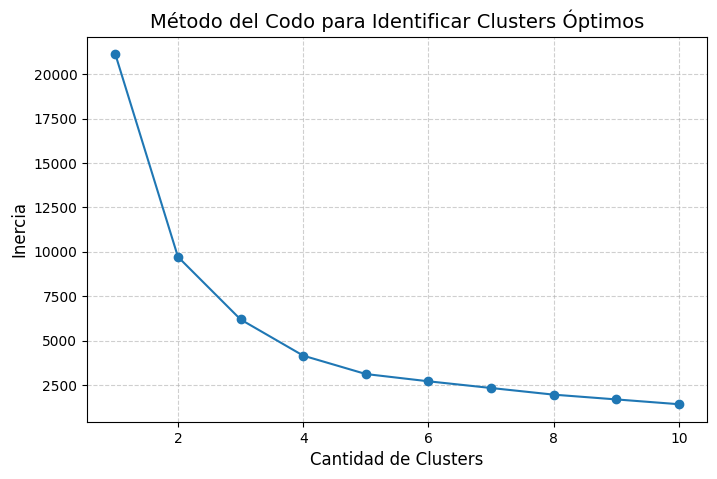


Resumen de clientes por cluster:
Cluster
0    2681
1    2201
2    2161
Name: count, dtype: int64


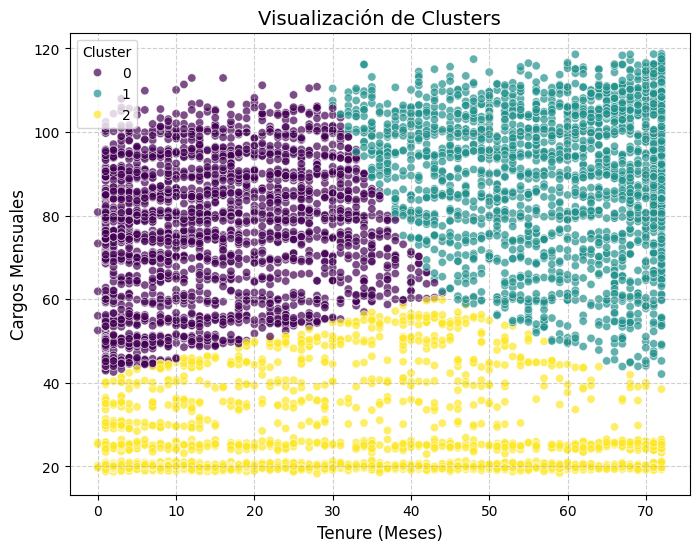

In [8]:
# Segmentación de Datos
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns  # Para visualización con scatterplot

# Filtrado de datos relevantes para clustering
variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
clustering_data = df[variables].copy()

# Limpieza de datos: manejo de valores faltantes y tipo de dato
clustering_data = clustering_data.dropna()
clustering_data['TotalCharges'] = pd.to_numeric(
    clustering_data['TotalCharges'].replace(' ', 0), errors='coerce'
)

# Normalización de las variables para uniformidad
scaler = StandardScaler().fit(clustering_data)
normalized_data = scaler.transform(clustering_data)

# Método del codo para determinar el número adecuado de clusters
inertia_values = []
for num_clusters in range(1, 11):
    model = KMeans(n_clusters=num_clusters, random_state=42).fit(normalized_data)
    inertia_values.append(model.inertia_)

# Representación gráfica del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-')
plt.title('Método del Codo para Identificar Clusters Óptimos', fontsize=14)
plt.xlabel('Cantidad de Clusters', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.show()

# Aplicación de K-Means con la cantidad óptima de clusters (e.g., 3)
n_clusters = 3
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
clustering_data['Cluster'] = kmeans_model.fit_predict(normalized_data)

# Resumen de la distribución de elementos en cada cluster
print("\nResumen de clientes por cluster:")
print(clustering_data['Cluster'].value_counts())

# Gráfica de dispersión para visualizar clusters (ejes: tenure vs MonthlyCharges)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_data['tenure'],
    y=clustering_data['MonthlyCharges'],
    hue=clustering_data['Cluster'],
    palette='viridis',
    alpha=0.7
)
plt.title('Visualización de Clusters', fontsize=14)
plt.xlabel('Tenure (Meses)', fontsize=12)
plt.ylabel('Cargos Mensuales', fontsize=12)
plt.legend(title='Cluster')
plt.grid(linestyle='--', alpha=0.6)
plt.show()


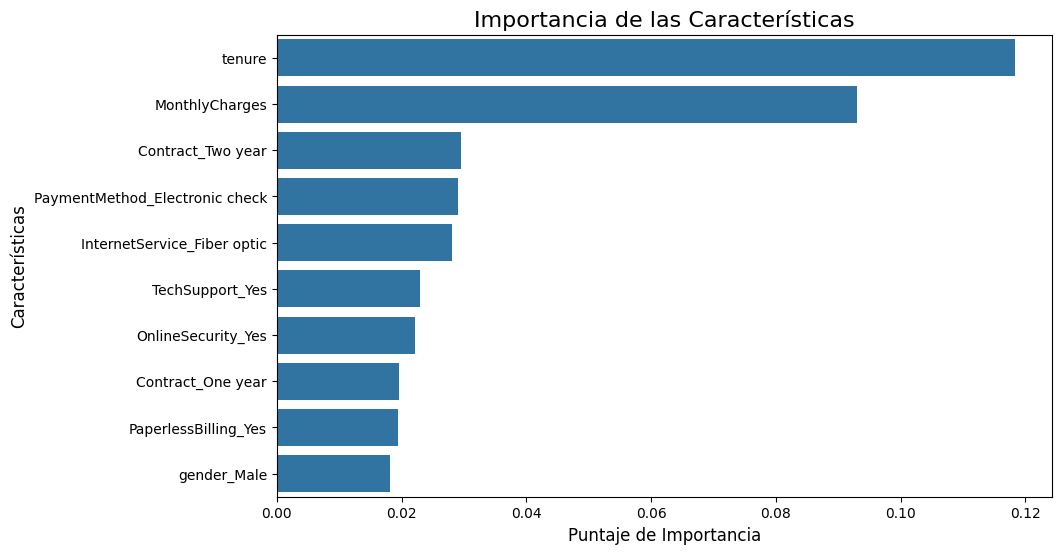

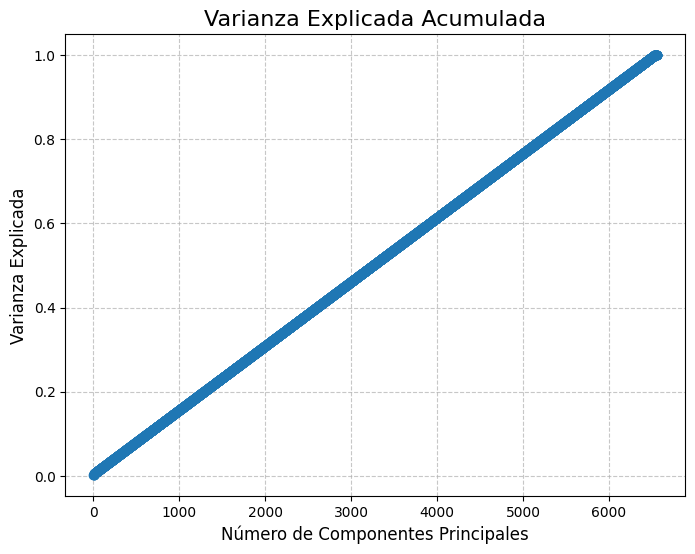


Componentes principales necesarios para el 95% de la varianza: 6202

Datos reducidos (primeras filas):
[[-0.80393867 -3.10111327 -4.40189009 ... -0.          0.
  -0.        ]
 [-0.32119041 -0.84967937 -1.41321327 ... -0.23705129 -0.78802984
  -2.09823605]
 [-0.46642913 -2.07368812 -0.99320248 ...  0.61626564 -0.16706389
  -0.14141477]
 [-1.08288192 -0.54595679 -5.94715475 ... -0.04593296  0.15037045
   0.09472274]
 [-0.97047593 -3.56239383  1.25838572 ...  0.65135997  0.50732892
  -1.68100315]]


In [9]:
# Selección y Extracción de Características
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Paso 1: Selección de características relevantes con RandomForestClassifier
# Preparar los datos: separar variables predictoras y objetivo
predictors = df.drop(columns=['customerID', 'Churn'])
target = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Procesar variables categóricas con One-Hot Encoding
predictors_encoded = pd.get_dummies(predictors, drop_first=True)

# Imputar valores faltantes utilizando la media
imputer = SimpleImputer(strategy='mean')
predictors_imputed = imputer.fit_transform(predictors_encoded)

# Convertir a DataFrame para mantener las columnas originales
predictors_imputed_df = pd.DataFrame(predictors_imputed, columns=predictors_encoded.columns)

# Escalado de las variables para homogeneizar las magnitudes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictors_imputed_df)

# Entrenar un RandomForestClassifier para identificar características importantes
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(scaled_data, target)

# Extraer y ordenar las importancias de las características
importances = pd.Series(rf_clf.feature_importances_, index=predictors_encoded.columns)
importances_sorted = importances.sort_values(ascending=False)

# Visualizar las 10 características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.head(10).values, y=importances_sorted.head(10).index)
plt.title('Importancia de las Características', fontsize=16)
plt.xlabel('Puntaje de Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()

# Paso 2: Reducción de dimensionalidad utilizando PCA
# Ajustar PCA para analizar la varianza explicada
pca_model = PCA()
pca_transformed = pca_model.fit_transform(scaled_data)

# Graficar la acumulación de la varianza explicada
plt.figure(figsize=(8, 6))
plt.plot(range(1, scaled_data.shape[1] + 1), np.cumsum(pca_model.explained_variance_ratio_), marker='o')
plt.title('Varianza Explicada Acumulada', fontsize=16)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Determinar el número mínimo de componentes para alcanzar el 95% de varianza explicada
components_95 = np.argmax(np.cumsum(pca_model.explained_variance_ratio_) >= 0.95) + 1
print(f"\nComponentes principales necesarios para el 95% de la varianza: {components_95}")

# Reducir las dimensiones a los componentes seleccionados
pca_reducer = PCA(n_components=components_95)
data_reduced = pca_reducer.fit_transform(scaled_data)

# Mostrar un ejemplo de las primeras filas de los datos reducidos
print("\nDatos reducidos (primeras filas):")
print(data_reduced[:5])

Resultados de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.57      0.48      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409


Resultados de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Resultados de Clasificación - SVM:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1036
           1       0.68      0.09      0.16       373

    accuracy                           0.75      14

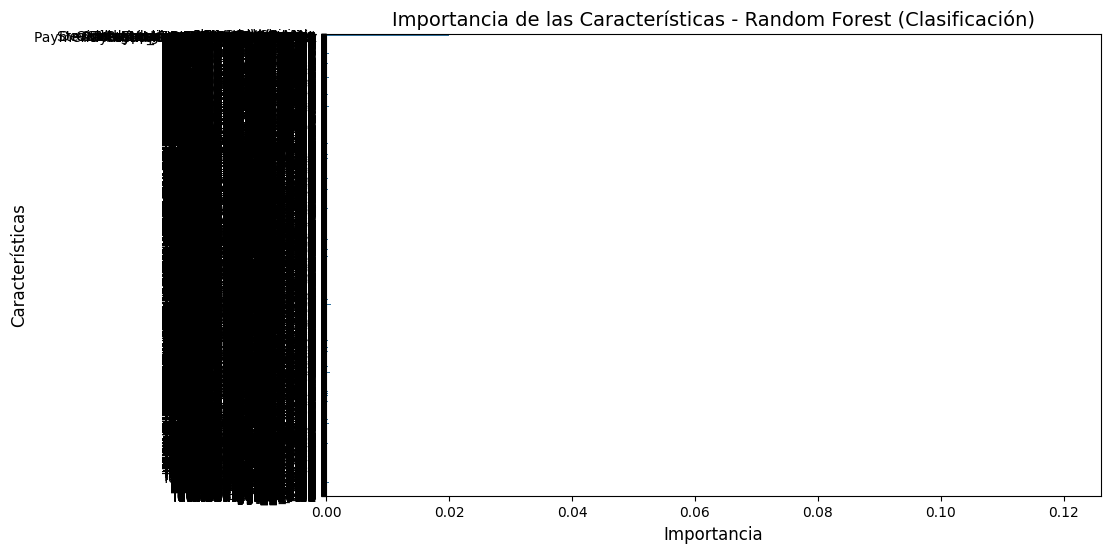

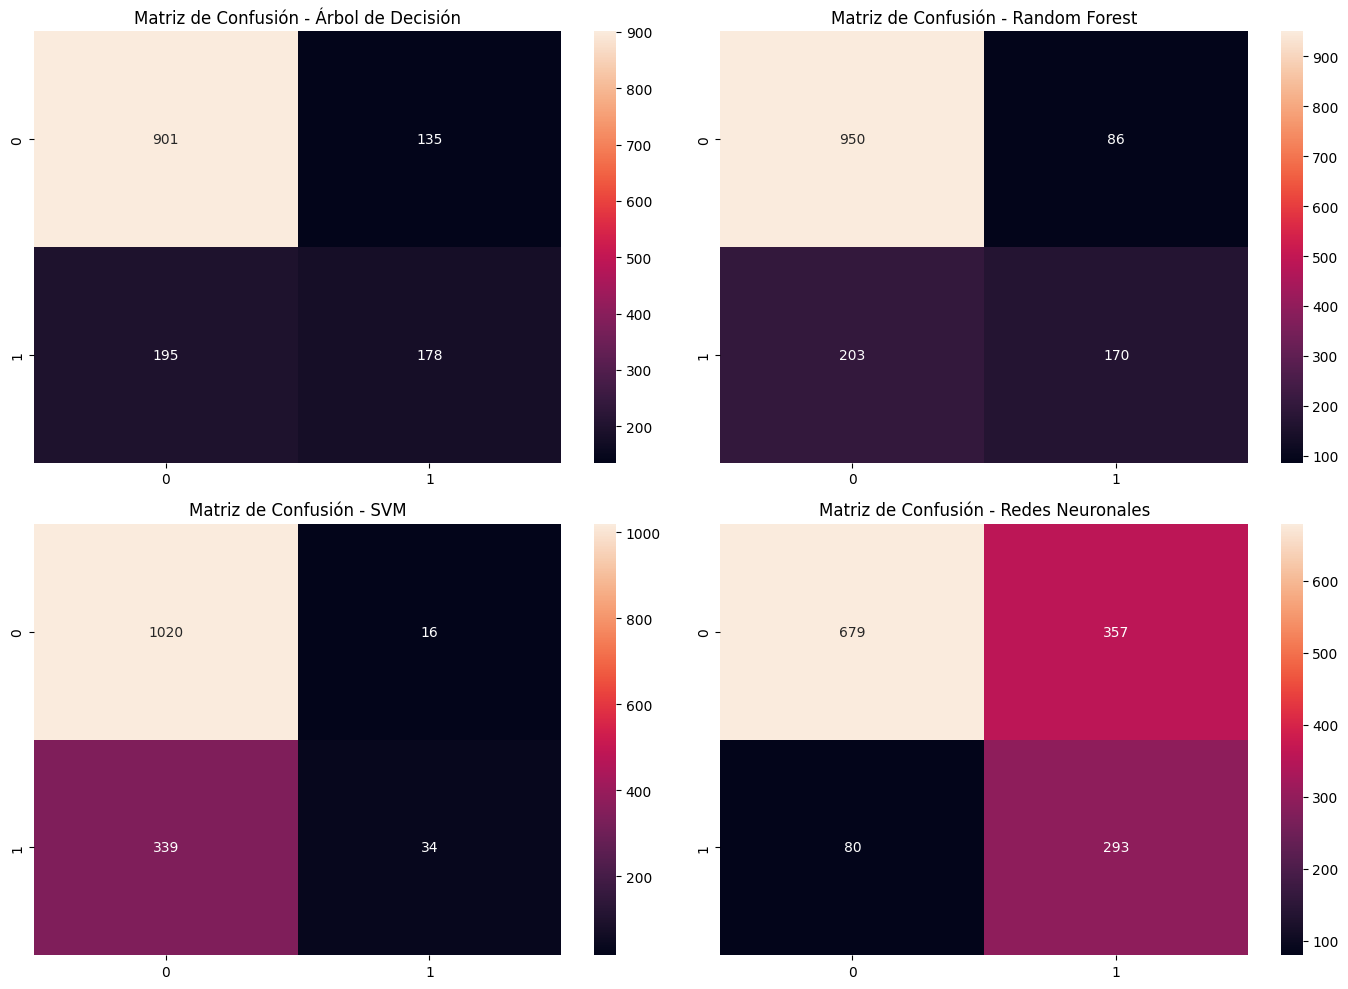

In [10]:
# Desarrollo de Modelos Predictivos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparación de datos: Preprocesamiento y selección de características
# Se utiliza 'Churn' como objetivo para clasificación y 'MonthlyCharges' para regresión
features = df.drop(columns=['customerID', 'Churn'])
target_class = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
target_reg = df['MonthlyCharges']

# Codificar variables categóricas mediante One-Hot Encoding
features_encoded = pd.get_dummies(features, drop_first=True)

# Estandarización de las características para modelos sensibles a la escala
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features_scaled, target_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features_scaled, target_reg, test_size=0.2, random_state=42)

# ------------------------ Clasificación ------------------------

# 1. Modelo de Clasificación: Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_cls, y_train_cls)
y_pred_dt_cls = dt_classifier.predict(X_test_cls)

# 2. Modelo de Clasificación: Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_classifier.predict(X_test_cls)

# 3. Modelo de Clasificación: SVM
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_cls, y_train_cls)
y_pred_svm_cls = svm_classifier.predict(X_test_cls)

# 4. Modelo de Clasificación: Redes Neuronales
nn_classifier = MLPClassifier(random_state=42, max_iter=1000)
nn_classifier.fit(X_train_cls, y_train_cls)
y_pred_nn_cls = nn_classifier.predict(X_test_cls)

# Evaluar desempeño en clasificación
print("Resultados de Clasificación - Árbol de Decisión:")
print(classification_report(y_test_cls, y_pred_dt_cls))

print("\nResultados de Clasificación - Random Forest:")
print(classification_report(y_test_cls, y_pred_rf_cls))

print("\nResultados de Clasificación - SVM:")
print(classification_report(y_test_cls, y_pred_svm_cls))

print("\nResultados de Clasificación - Redes Neuronales:")
print(classification_report(y_test_cls, y_pred_nn_cls))

# ------------------------ Regresión ------------------------

# 1. Modelo de Regresión: Árbol de Decisión
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)
y_pred_dt_reg = dt_regressor.predict(X_test_reg)

# 2. Modelo de Regresión: Random Forest
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_regressor.predict(X_test_reg)

# 3. Modelo de Regresión: SVM
svm_regressor = SVR()
svm_regressor.fit(X_train_reg, y_train_reg)
y_pred_svm_reg = svm_regressor.predict(X_test_reg)

# 4. Modelo de Regresión: Redes Neuronales
nn_regressor = MLPRegressor(random_state=42, max_iter=1000)
nn_regressor.fit(X_train_reg, y_train_reg)
y_pred_nn_reg = nn_regressor.predict(X_test_reg)

# Evaluar desempeño en regresión
print("\nResultados de Regresión - Árbol de Decisión:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_dt_reg):.4f}")

print("\nResultados de Regresión - Random Forest:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_rf_reg):.4f}")

print("\nResultados de Regresión - SVM:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_svm_reg):.4f}")

print("\nResultados de Regresión - Redes Neuronales:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_nn_reg):.4f}")

# Visualizar la importancia de las características en Random Forest (Clasificación)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_classifier.feature_importances_, y=features_encoded.columns)
plt.title('Importancia de las Características - Random Forest (Clasificación)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()

# Visualizar matrices de confusión para clasificación
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_dt_cls), annot=True, fmt="d", ax=axes[0, 0])
axes[0, 0].set_title('Matriz de Confusión - Árbol de Decisión')

sns.heatmap(confusion_matrix(y_test_cls, y_pred_rf_cls), annot=True, fmt="d", ax=axes[0, 1])
axes[0, 1].set_title('Matriz de Confusión - Random Forest')

sns.heatmap(confusion_matrix(y_test_cls, y_pred_svm_cls), annot=True, fmt="d", ax=axes[1, 0])
axes[1, 0].set_title('Matriz de Confusión - SVM')

sns.heatmap(confusion_matrix(y_test_cls, y_pred_nn_cls), annot=True, fmt="d", ax=axes[1, 1])
axes[1, 1].set_title('Matriz de Confusión - Redes Neuronales')

plt.tight_layout()
plt.show()

Random Forest - Validación Cruzada (Precisión): 0.7914 ± 0.0038
Decision Tree - Validación Cruzada (Precisión): 0.7563 ± 0.0075
SVM - Validación Cruzada (Precisión): 0.7410 ± 0.0047
Neural Network - Validación Cruzada (Precisión): 0.6720 ± 0.0223

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


AUC-ROC para Random Forest: 0.8424


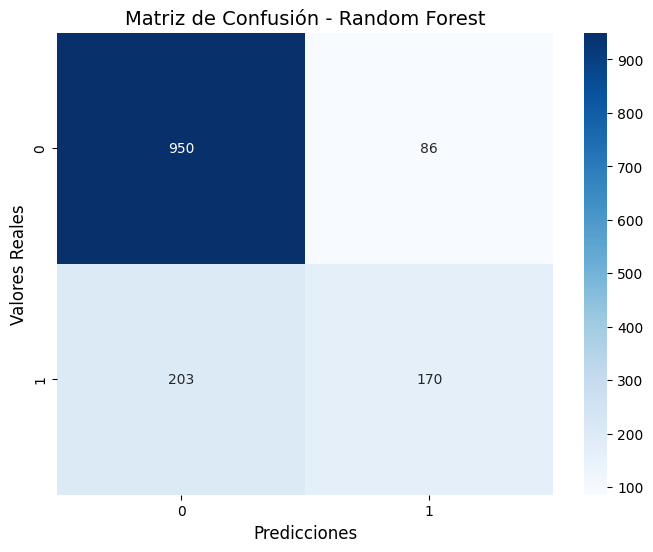


Resultados de Regresión - Random Forest:
Error Absoluto Medio (MAE): 0.0101
Raíz del Error Cuadrático Medio (RMSE): 0.0324


In [13]:
# Evaluación y Validación de Modelos
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    roc_auc_score,
)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial: División de datos y preprocesamiento
predictors = df.drop(columns=['customerID', 'Churn'])  # Selección de predictores
target_class = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Objetivo para clasificación

# Codificar variables categóricas
predictors_encoded = pd.get_dummies(predictors, drop_first=True)

# Normalizar datos para modelos como SVM y Redes Neuronales
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors_encoded)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    predictors_scaled, target_class, test_size=0.2, random_state=42
)

# ------------------ Validación Cruzada ------------------

# Modelos a evaluar
classification_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
}

# Resultados de validación cruzada
cv_results = {}

for model_name, model in classification_models.items():
    # Validación cruzada con 5 pliegues
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_scores
    print(f"{model_name} - Validación Cruzada (Precisión): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ------------------ Evaluación en Conjunto de Prueba ------------------

# Entrenamiento y evaluación de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
predictions_rf = rf_classifier.predict(X_test)

# Reporte de métricas para clasificación
print("\nReporte de Clasificación - Random Forest:")
print(classification_report(y_test, predictions_rf))

# Cálculo del AUC-ROC
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"\nAUC-ROC para Random Forest: {roc_auc_rf:.4f}")

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión - Random Forest', fontsize=14)
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Valores Reales', fontsize=12)
plt.show()

# ------------------ Evaluación en Tarea de Regresión ------------------

# Configuración para regresión
target_reg = df['MonthlyCharges']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    predictors_scaled, target_reg, test_size=0.2, random_state=42
)

# Modelo de regresión: Random Forest
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
predictions_rf_reg = rf_regressor.predict(X_test_reg)

# Evaluación con métricas de regresión
mae_rf = mean_absolute_error(y_test_reg, predictions_rf_reg)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, predictions_rf_reg))

print("\nResultados de Regresión - Random Forest:")
print(f"Error Absoluto Medio (MAE): {mae_rf:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_rf:.4f}")


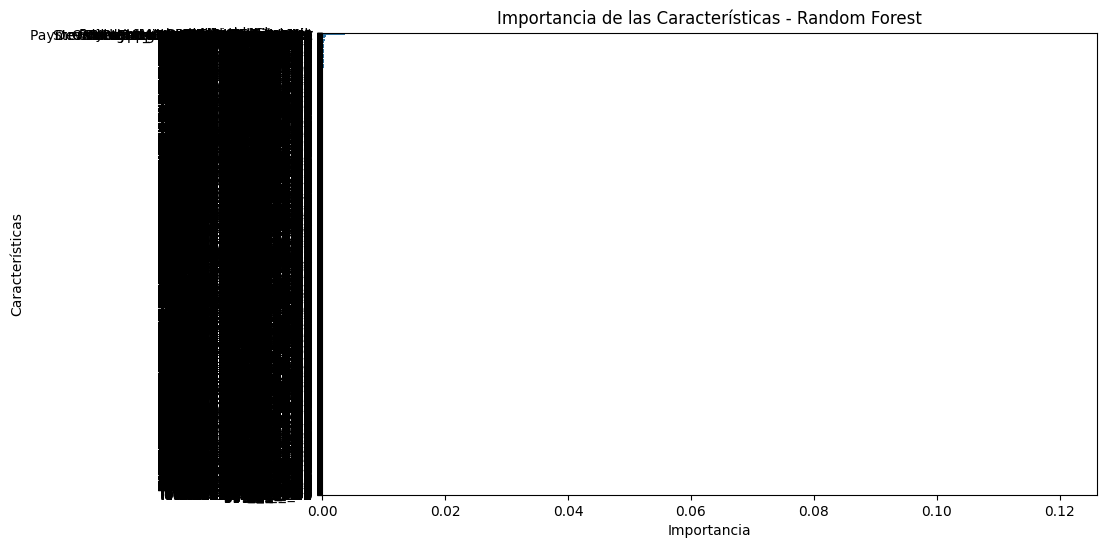

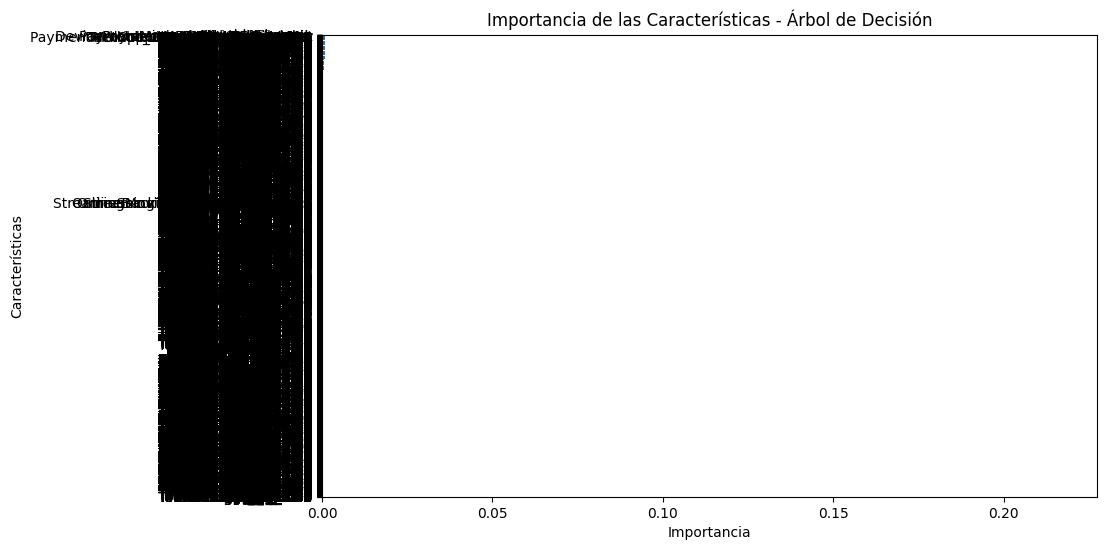

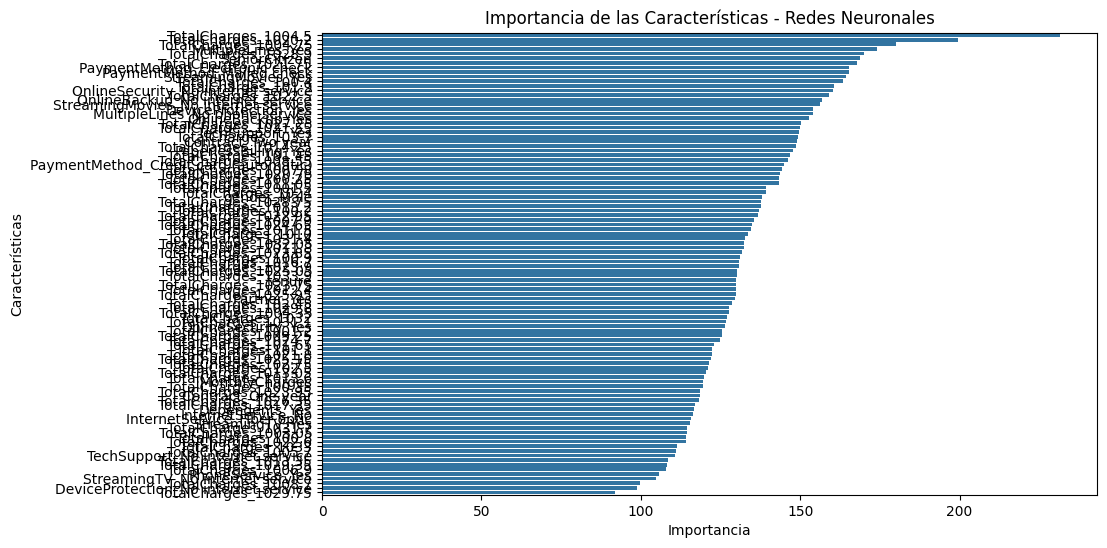

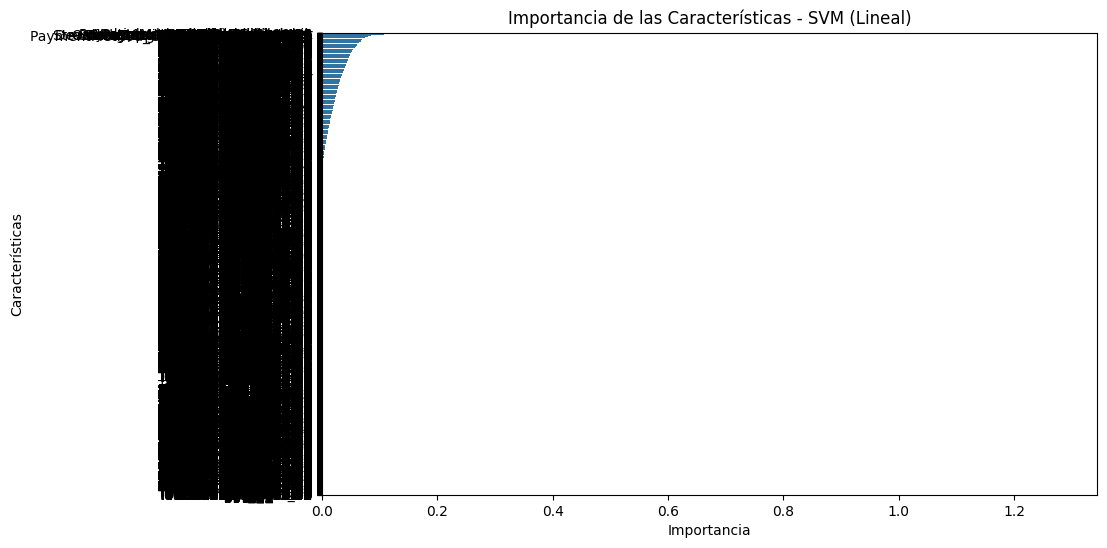

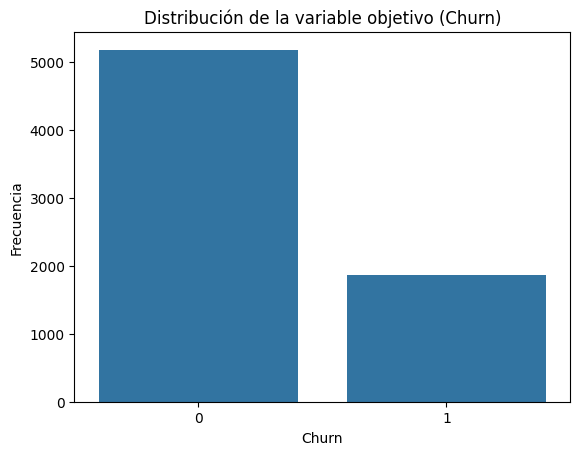

Exactitud en entrenamiento (Random Forest): 0.9979
Exactitud en prueba (Random Forest): 0.7949
Exactitud en entrenamiento (Árbol de Decisión): 0.9979
Exactitud en prueba (Árbol de Decisión): 0.7658


In [14]:
# Interpretación de Resultados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Preparación de datos: codificación y escalado
X = df.drop(columns=['customerID', 'Churn'])  # Predictores
y_classification = df['Churn'].map({'Yes': 1, 'No': 0})  # Objetivo binario

# Codificación y escalado
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler().fit(X_encoded)
X_scaled = scaler.transform(X_encoded)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_classification, test_size=0.2, random_state=42
)

# Función para visualizar la importancia de características
def plot_feature_importance(importances, feature_names, title):
    sorted_indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices])
    plt.title(title)
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.show()

# 1. Modelo Random Forest
model_rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
plot_feature_importance(
    model_rf.feature_importances_, np.array(X_encoded.columns),
    'Importancia de las Características - Random Forest'
)

# 2. Modelo Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
plot_feature_importance(
    model_dt.feature_importances_, np.array(X_encoded.columns),
    'Importancia de las Características - Árbol de Decisión'
)

# 3. Redes Neuronales (MLP)
model_nn = MLPClassifier(random_state=42, max_iter=1000).fit(X_train, y_train)
importance_nn = np.abs(model_nn.coefs_[0]).sum(axis=0)  # Importancia acumulada
plot_feature_importance(
    importance_nn, np.array(X_encoded.columns[:len(importance_nn)]),
    'Importancia de las Características - Redes Neuronales'
)

# 4. Modelo SVM con kernel lineal
model_svm = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
plot_feature_importance(
    np.abs(model_svm.coef_.flatten()), np.array(X_encoded.columns),
    'Importancia de las Características - SVM (Lineal)'
)

# 5. Análisis de sesgo: Distribución de clases
sns.countplot(x=y_classification)
plt.title('Distribución de la variable objetivo (Churn)')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Evaluación de modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f'Exactitud en entrenamiento ({model_name}): {train_acc:.4f}')
    print(f'Exactitud en prueba ({model_name}): {test_acc:.4f}')

evaluate_model(model_rf, X_train, X_test, y_train, y_test, 'Random Forest')
evaluate_model(model_dt, X_train, X_test, y_train, y_test, 'Árbol de Decisión')